<div align="center">
    <img src="immagini/LogoUnipa.jpg" width="200" height="auto"> <center>
    <br>

# <center> **Università degli Studi di Palermo**
# <center> **Corso di Laurea triennale in Informatica**
# <center> **Tecniche per la gestione degli Open Data - Elaborato finale**
<br>

### <center> _Professore: Davide Taibi_
### <center> _Studente: Marco Cammalleri (matricola 0653734)_


***
***

# __Indice__

###  [`1. - Introduzione`](#1-introduzione)
### [`2. - Selezione dei dataset e relative licenze`](#2-selezione-dei-dataset-e-relative-licenze)
### [`3. - Elaborazione dei dataset`](#3-elaborazione-dei-dataset)
##### &emsp;&emsp; [`3.1 - Lettura e pulizia`](#31-lettura-e-pulizia)
##### &emsp;&emsp; [`3.2 - Merge`](#32-merge)
### [`4. - Ontologia`](#4-ontologia)
### [`5. - Passaggio a 5 stelle`](#5-passaggio-a-5-stelle)
### [`6. - Data visualization`](#6-data-visualization)

***
***
# __`1) Introduzione`__

Si suppone che un utente, mentre si trovava in vacanza a Firenze, abbia ricevuto una notifica di cancellazione del volo, il tutto dopo aver fatto check-out nell'albergo in cui alloggiava. Deve quindi cercare un nuovo albergo.

Si suppone inoltre che voglia alloggiare in una struttura ricettiva che si trovi entro un raggio di x chilometri dalla sua posizione. Interrogherà quindi il servizio affinché possa avere una lista delle possibili strutture ricettive.

L'utente sceglie di effettuare una valutazione delle strutture basandosi sul minor rapporto metri/stelle.
Dopo aver alloggiato, dovrà decidere dove cenare. Sceglierà il ristorante allo stesso modo, data la sua posizione.

***
***
# __`2) Selezione dei dataset e relative licenze`__

1)Il primo dataset è relativo alle Strutture ricettive (parziali, georeferenziate) della regione Toscana, fornito dalla Regione Toscana (https://www.regione.toscana.it/) le cui colonne sono, nel dataset originale:

-_id_: codice univoco delle strutture<br>
-_url_: riferimento della struttura nella mappa<br>
-_name_: nome<br>
-_category_: categoria<br>
-_phone_: telefono<br>
-_fax_ <br>
-_address_: indirizzo della struttura<br>
-_city_: città<br>
-_province_: provincia<br>
-_website_: sito web<br>
-_email_ <br>
-_facilities_: riga relativa ai servizi aggiuntivi della struttura <br>
-_rate_: valutazione in stelle da 1 a 5<br>
-_DO_Y_ e _DO_X_: relativi alle coordinate <br>
-_PRO_COM_: relativo al comune <br>
-_ISTATPRO_ e _ISTATREG_: relativi rispettivamente alla provincia e alla regione


Licenza: https://creativecommons.org/licenses/by/4.0/

2)Il secondo dataset si riferisce ai ristoranti della provincia di Firenze e si può raggiungere tramite il collegamento:
https://dati.toscana.it/dataset/rt-vetrinatoscana

Licenza: https://opendefinition.org/licenses/cc-by/. Nel dataset originale le colonne sono: <br>
-_id_<br>
-_nome_<br>
-_lat_<br>
-_lon_<br>
-_tipologia_<br>
-_indirizzo_<br>
-_cap_<br>
-_comune_<br>
-_province_<br>
-_email_<br>
-_telefono_<br>
-_fax_<br>

3)Dataset relativo al movimento della popolazione della regione Toscana tra l'1 Gennaio e il 31 Dicembre 2022, che può essere utile nella fase di _Data Visualization_. <br> 
Fonte: https://dati.toscana.it <br>
Licenze: https://opendefinition.org/od/2.1/en/ <br>

Le colonne sono:<br>

-_Anno_<br>
-_Codice Comune_<br>
-_Provincia_<br>
-_Comune_<br>
-_POPOLAZIONE RESIDENTE AL 1 GENNAIO 2022_<br>
-_NATI VIVI_<br>
-_MORTI_<br>
-_ISCRITTI DALL'ESTERO_<br>
-_ISCRITTI DALL'INTERNO_<br>
-_ALTRI ISCRITTI_<br>
-_CANCELLATI PER L'ESTERO_<br>
-_CANCELLATI PER L'INTERNO_<br>
-_ALTRI CANCELLATI_<br>
-_SALDO CENSUARIO TOTALE_<br>
-_POPOLAZIONE RESIDENTE AL 31 DICEMBRE 2022_<br>

Dei tre dataset è quello che verrà scremato di più, infatti rimarranno soltanto le colonne relative al Comune, alla provincia e alla popolazione totale alla data 31 Dicembre 2021. <br>

I dataset si possono trovare nel percorso "_dataset/originali_".

***
***
# __`3) Elaborazione dei dataset`__

_`3.1 Lettura e pulizia`_

Per quanto riguarda la pulizia dei dataset, ho utilizzato in una prima fase OpenRefine con cui ho inizialmente cancellato quelle righe il cui campo "city" è diverso da "Firenze", dal momento che al cliente interessa alloggiare in tale città, attraverso il comando "Filter".

<div align="center">
    <img src="immagini/filter.png" width="1000" height="auto"> <center>
    <br>

Sempre tramite OpenRefine ho effettuato la modifica alle celle che presentavano errori grammaticali, come le lettere apostrofate laddove sarebbero dovute essere accentate. Ho utilizzato le espressioni regolari e la funzione "replace":
<div align="center">
    <img src="immagini/accenti.png" width="500" height="auto"> <center>
    <br>



Un'altra operazione di pulizia è stata eseguita relativamente ai numeri di telefono (e fax) che presentavano "+39" all'inizio dell'occorrenza: dal momento che la maggior parte dei numeri non presentano tale occorrenza, ho deciso di per far sì che i valori fossero coerenti, sia nel file relativo alle strutture ricettive, sia in quello relativo alle botteghe e ristoranti. Anche ciò è stato fatto tramite la funzione _replace_ di OpenRefine:


<div align="center">
    <img src="immagini/Screenshot 2024-01-21 180432.png" width="500" height="auto"> <center>
    <br>

Alcuni numeri telefonici presentavano invece caratteri come "/" che ho preferito cancellare affinché si presentassero nella forma degli altri.
<div align="center">
    <img src="immagini/Screenshot 2024-01-22 121515.png" width="500" height="auto"> <center>
    <br>


Inoltre, in previsione del merge, ho modificato i valori del campo relativo all'id per assicurarmi dell'unicità di questi: in particolare, ho aggiunto le occorrenze "sr" e "rb" alla fine dei valori del campo "id" rispettivamente nel dataset sulle strutture ricettive, e in quello dei ristoranti e delle botteghe:
<div align="center">
    <img src="immagini/editcolumnid.png" width="500" height="auto"> <center>
    <br>


Nei campi in cui fosse opportuno, ho fatto in modo che, avendo una sequenza separata da spazi, soltando le iniziali fossero maiuscole. 

<div align="center">
    <img src="immagini/case.png" width="500" height="auto"> <center>
    <br>

Fatte delle prime operazioni di raffinamento dei dataset con _OpenRefine_, facciamo un'ulteriore pulizia con _Pandas_ preventiva al merge:

In [22]:
import pandas as pd


sr = pd.read_csv("dataset/prima_pulizia/SR_Refine.csv")
rb = pd.read_csv("dataset/prima_pulizia/RB_Refine.csv")

# Rinominiamo le colonne di sr
sr.rename(columns={"id": "Id", "name": "Nome", "category": "Categoria", "phone": "Telefono", "fax": "Fax", "email": "Email", "city": "Comune", "province": "SiglaProvincia", "DO_Y": "Latitudine", "DO_X": "Longitudine", "ISTATPRO": "Provincia", "address": "Indirizzo", "rate": "Valutazione"}, inplace=True)
rb.rename(columns={"id": "Id", "nome": "Nome", "tipologia": "Categoria", "telefono": "Telefono", "fax": "Fax", "email": "Email", "provincia": "Provincia", "lat": "Latitudine", "lon": "Longitudine", "comune": "Comune", "indirizzo": "Indirizzo"}, inplace=True)


print(rb.head())



       Id                       Nome  Latitudine  Longitudine   Categoria  \
0  2363rb           Borgo San Jacopo   43.700650    10.744434  Ristorante   
1   686rb    Ristorante "La Certosa"   43.730208    11.223357  Ristorante   
2  2026rb           Osteria Di Giogo   43.747127    11.294038  Ristorante   
3  2351rb  Erboristeria Albero Verde   43.749731    11.221211     Bottega   
4  2644rb            Trattoria Omero   43.751175    11.256254  Ristorante   

                    Indirizzo      cap                Comune Provincia  \
0   Via Borgo San Jacopo 32/r  50125.0               Firenze   Firenze   
1               Via Cassia, 1  50124.0               Firenze   Firenze   
2        Via Chiantigiana 106  50126.0  Ponte A Ema, Firenze   Firenze   
3   Via Senese, 221-223/rosso  50124.0     Galluzzo, Firenze   Firenze   
4  Via Pian Dei Giullari 11/r  50125.0      Arcetri, Firenze   Firenze   

                        Email     Telefono          Fax SiglaProvincia  \
0  bsj@lungarnocol

Adesso aggiungo al dataset rb una colonna "SiglaProvincia" in cui, se ad esempio nel campo "Provincia" ho Arezzo
il valore corrispondente in "SiglaProvincia" sarà "AR" e così via per tutte le province della Toscana. 

In [16]:

def mappa_sigla(provincia):
    toscana_sigle = {"Arezzo": "AR", "Firenze": "FI", "Grosseto": "GR", "Livorno": "LI", "Lucca": "LU",
                     "Massa Carrara": "MS", "Pisa": "PI", "Pistoia": "PT", "Prato": "PO", "Siena": "SI"}
    return toscana_sigle.get(provincia, provincia) if pd.notna(provincia) else provincia

#Aggiungo la colonna "SiglaProvincia" utilizzando la funzione di mapping
rb["SiglaProvincia"] = rb["Provincia"].apply(mappa_sigla)

print(rb.head())

       Id                       Nome  Latitudine  Longitudine   Categoria  \
0  2363rb           Borgo San Jacopo   43.700650    10.744434  Ristorante   
1   686rb    Ristorante "La Certosa"   43.730208    11.223357  Ristorante   
2  2026rb           Osteria Di Giogo   43.747127    11.294038  Ristorante   
3  2351rb  Erboristeria Albero Verde   43.749731    11.221211     Bottega   
4  2644rb            Trattoria Omero   43.751175    11.256254  Ristorante   

                    Indirizzo      cap                Comune Provincia  \
0   Via Borgo San Jacopo 32/r  50125.0               Firenze   Firenze   
1               Via Cassia, 1  50124.0               Firenze   Firenze   
2        Via Chiantigiana 106  50126.0  Ponte A Ema, Firenze   Firenze   
3   Via Senese, 221-223/rosso  50124.0     Galluzzo, Firenze   Firenze   
4  Via Pian Dei Giullari 11/r  50125.0      Arcetri, Firenze   Firenze   

                        Email     Telefono          Fax SiglaProvincia  
0  bsj@lungarnocoll

Adesso aggiungo una nuova colonna "Valutazione" al dataset relativo al ristorante, i cui valori saranno fissati di default a 1. In entrambi i dataset creo una colonna "EsisteRecensione" che assume un valore booleano (In particolare 1 per il dataset relativo alle strutture ricettive e 0 per quello relativo ai ristoranti). Il motivo di tali scelte lo approfondirò nella fase dedicata alle query Sparql.

In [17]:
rb["Valutazione"] = 1
sr["EsisteValutazione"] = 1
rb["EsisteValutazione"] = 0

sr.to_csv("dataset/prima_pulizia/SR_Refine.csv", index=False)
rb.to_csv("dataset/prima_pulizia/RB_Refine.csv", index=False)


Elimino le colonne superflue o che non sono in comune tra i due dataset. Gestisco i dati mancanti

In [3]:
import pandas as pd


sr = pd.read_csv("SR_Refine.csv")
rb = pd.read_csv("RB_Refine.csv")


#Colonne da eliminare:
colonne_sr = ["url", "website", "facilities", "PRO_COM", "Regione", "Fax"]
sr = sr.drop(columns=colonne_sr)

colonne_rb = ["cap", "Fax"]
rb = rb.drop(columns=colonne_rb)

#Voglio verificare anche che i dati delle due tabelle abbiano lo stesso tipo:
###
tipi_di_dati = sr.dtypes
print(tipi_di_dati)

tipi_di_dati2 = rb.dtypes
print(tipi_di_dati2)

#-----------------------------

#Cancellazione delle righe con dei valori NaN e verifica della loro assenza

sr = sr.dropna()
rb = rb.dropna()



sr_clean = sr.dropna()
rb_clean = rb.dropna()

nan_rows_info = sr[sr[["Id", "Nome", "Categoria", "Telefono", "Indirizzo", "Comune", "SiglaProvincia", "Email", "Valutazione", "Latitudine", "Longitudine", "Provincia", "EsisteValutazione"]].isnull().any(axis=1)]


numero_righe_nan = len(nan_rows_info)


print("-------------------------")
print("Numero di righe con valori NaN nelle colonne (Strutture ricettive):", numero_righe_nan)
print("-------------------------")

nan_rows_info2 = rb[rb[["Id", "Nome", "Categoria", "Telefono", "Indirizzo", "Comune", "SiglaProvincia", "Email", "Valutazione", "Latitudine", "Longitudine", "Provincia", "EsisteValutazione"]].isnull().any(axis=1)]


numero_righe_nan2 = len(nan_rows_info2)
print("Numero di righe con valori NaN nelle colonne (Ristoranti e botteghe):", numero_righe_nan2)





Id                    object
Nome                  object
Categoria             object
Telefono              object
Indirizzo             object
Comune                object
SiglaProvincia        object
Email                 object
Valutazione            int64
Latitudine           float64
Longitudine          float64
Provincia             object
EsisteValutazione      int64
dtype: object
Id                    object
Nome                  object
Latitudine           float64
Longitudine          float64
Categoria             object
Indirizzo             object
Comune                object
Provincia             object
Email                 object
Telefono              object
SiglaProvincia        object
Valutazione            int64
EsisteValutazione      int64
dtype: object
-------------------------
Numero di righe con valori NaN nelle colonne (Strutture ricettive): 0
-------------------------
Numero di righe con valori NaN nelle colonne (Ristoranti e botteghe): 0


In [35]:
print(sr.head())


sr.to_csv('dataset/pre-merge/SR_Refine_final.csv', index=False)
rb.to_csv('dataset/pre-merge/RB_Refine_final.csv', index=False)

    Id             Nome Categoria     Telefono                     Indirizzo  \
0  2sr            Flora  Alberghi  0586 600015              Via Del Mare, 26   
1  3sr  Hotel Hermitage  Alberghi  0586 600218         Via Dei Melograni, 13   
2  5sr  Hotel Marinetta  Alberghi  0586 600598  Via Dei Cavalleggeri Nord, 3   
3  6sr       Hotel Nina  Alberghi  0586 600039              Via Del Forte, 7   
4  9sr     Varo Village  Alberghi  0586 600500            Via Del Forte, 1-5   

    Comune SiglaProvincia                           Email  Valutazione  \
0  Bibbona             LI              info@florahotel.eu            3   
1  Bibbona             LI  info@hotelhermitagebibbona.com            4   
2  Bibbona             LI          info@hotelmarinetta.it            4   
3  Bibbona             LI               info@hotelnina.it            3   
4  Bibbona             LI            info@varovillage.com            4   

   Latitudine  Longitudine Provincia  EsisteValutazione  
0   43.246453   

_`3.2 Merge`_

Effettuiamo un _Merge_ tra il dataset "SR_Refine_final" relativo alle Strutture ricettive, e "RB_Refine_final" relativo a ristoranti e botteghe, attraverso la funzione _concat_ di pandas

In [1]:
import pandas as pd

sr = pd.read_csv('dataset/pre-merge/SR_Refine_final.csv')
rb = pd.read_csv('dataset/pre-merge/RB_Refine_final.csv')


m = pd.concat([sr, rb], axis = 1)


m.to_csv('SR_RB_Merged.csv', index=False, encoding='utf-8')


In [40]:
print(m.head())

    Id             Nome Categoria     Telefono                     Indirizzo  \
0  2sr            Flora  Alberghi  0586 600015              Via Del Mare, 26   
1  3sr  Hotel Hermitage  Alberghi  0586 600218         Via Dei Melograni, 13   
2  5sr  Hotel Marinetta  Alberghi  0586 600598  Via Dei Cavalleggeri Nord, 3   
3  6sr       Hotel Nina  Alberghi  0586 600039              Via Del Forte, 7   
4  9sr     Varo Village  Alberghi  0586 600500            Via Del Forte, 1-5   

    Comune SiglaProvincia                           Email  Valutazione  \
0  Bibbona             LI              info@florahotel.eu            3   
1  Bibbona             LI  info@hotelhermitagebibbona.com            4   
2  Bibbona             LI          info@hotelmarinetta.it            4   
3  Bibbona             LI               info@hotelnina.it            3   
4  Bibbona             LI            info@varovillage.com            4   

   Latitudine  Longitudine Provincia  EsisteValutazione  
0   43.246453   

Facciamo anche il merge con il dataset relativo alla popolazione, dopo aver fatto delle operazioni di pulizia preventive.

In [2]:
import pandas as pd

df = pd.read_csv("dataset/originali/movimento_popolazione_2022.csv")

# Seleziono solo le colonne desiderate
df_selected = df[["Territorio", "popolazione al 31 dicembre"]]

# Rinomino le colonne
df_selected = df_selected.rename(columns={"popolazione al 31 dicembre": "Popolazione", "Territorio": "Comune"})

df_selected.to_csv("dataset/prima_pulizia/popolazione.csv", index=False)


Altri due problemi da risolvere sono: i dati della colonna "Popolazione" sono di tipo float, e la stessa colonna presenta dei valori NaN, questo perché alcune denominazioni di comuni presentano leggere differenze a seconda dei singoli due dataset su cui dovremo svolgere l'operazione di merge. 
Risolviamo innanzitutto il problema dei valori NaN: facciamo in modo che i comuni rispettino dei pattern ben precisi per assicurarci della corrispondenza tra i due dataset, quindi utilizziamo nuovamente OpenRefine per far sì che anche i valori della colonna "Comune" del dataset relativo alla popolazione abbiano la proprietà "_Title case_". Inoltre eliminiamo, nel dataset dei locali, informazioni superflue come l'occorrenza ", Firenze" dopo il comune.
Infine facciamo il merge con la conversione da float a integer.

In [3]:
import pandas as pd


df_sr_rb_merged = pd.read_csv("dataset/merge/SR-RB-Merged.csv")
df_popolazione = pd.read_csv("dataset/prima_pulizia/popolazione.csv")

# join basato su "Comune" e "SiglaProvincia"
df_result = pd.merge(df_sr_rb_merged, df_popolazione, on=["Comune"], how="left")

# Converto la colonna 'Popolazione' in interi, inclusi i NaN
df_result['Popolazione'] = pd.to_numeric(df_result['Popolazione'], errors='coerce').astype('Int64')

#Numero divalori mancanti nella colonna "Popolazione"
missing_values_count = df_result['Popolazione'].isnull().sum()

# Trovo gli ID delle righe con valori mancanti nella colonna "Popolazione"
rows_with_missing_values = df_result[df_result['Popolazione'].isnull()]


print("ID delle righe con valori mancanti nella colonna 'Popolazione':")
print(rows_with_missing_values['Comune'])


print(df_result.head())

df_result.to_csv("dataset/merge/Merged.csv", index=False)


ID delle righe con valori mancanti nella colonna 'Popolazione':
5                 Campo Nell'elba
85                Poggio A Caiano
113     Castiglione Della Pescaia
114     Castiglione Della Pescaia
115     Castiglione Della Pescaia
                  ...            
2069               Campo Di Marte
2074               Campo Di Marte
2082                    Trespiano
2094                       Novoli
2097                       Novoli
Name: Comune, Length: 411, dtype: object
    Id             Nome Categoria     Telefono                     Indirizzo  \
0  2sr            Flora  Alberghi  0586 600015              Via Del Mare, 26   
1  3sr  Hotel Hermitage  Alberghi  0586 600218         Via Dei Melograni, 13   
2  5sr  Hotel Marinetta  Alberghi  0586 600598  Via Dei Cavalleggeri Nord, 3   
3  6sr       Hotel Nina  Alberghi  0586 600039              Via Del Forte, 7   
4  9sr     Varo Village  Alberghi  0586 600500            Via Del Forte, 1-5   

    Comune SiglaProvincia               

Adesso disponiamo del dataset opportunamente pulito affinché si possano soddisfare le esigenze del cliente.<br>
Supponiamo che il cliente si trovi alla Basilica di Santa Maria Novella a Firenze, e voglia vedere quali sono i locali nel raggio di 3 chilometri. Tra questi sceglierà quello col minor rapporto distanza/valutazione. Utilizziamo la libreria _geopy_.

In [5]:
import geopy.distance
import pandas as pd

df = pd.read_csv("dataset/merge/Merged.csv")

#coordinate della Basilica di Santa Maria Novella
target_lat = 43.77469620702199
target_lon = 11.249366103544451
target = (target_lat, target_lon)
radius_km = 3

#filtro all'interno del raggio
df_filtered = df[df.apply(lambda row: geopy.distance.geodesic(target, (row['Latitudine'], row['Longitudine'])).km <= radius_km, axis=1)]

#inizializzo le variabili per tracciare la distanza minima e il luogo corrispondente
min_distance = float('inf')
nearest_location = None

min_ratio = float('inf')
nearest_ratio_location = None


for index, row in df_filtered.iterrows():
 
    if row['Valutazione'] != 0:

        location_coords = (row['Latitudine'], row['Longitudine'])
        

        distance = geopy.distance.geodesic(target, location_coords).km
        
       
        ratio = distance / row['Valutazione']

        # aggiorno la distanza minima e il luogo corrispondente se necessario
        if distance < min_distance:
            min_distance = distance
            nearest_location = row['Nome'], row['Latitudine'], row['Longitudine'], row['Valutazione']
            
        if ratio < min_ratio:
            min_ratio = ratio
            nearest_ratio_location = row['Nome'], row['Latitudine'], row['Longitudine'], row['Valutazione']


print(f"Locali all'interno del raggio di {radius_km} km:")
print(df_filtered[['Nome', 'Latitudine', 'Longitudine']])

print(f"\nLa distanza più piccola è: {min_distance} km")
print(f"Il luogo più vicino è: {nearest_location}")

print(f"Il rapporto minimo è: {min_ratio}")
print(f"Il luogo con il minor rapporto distanza/valutazione è: {nearest_ratio_location}")


Locali all'interno del raggio di 3 km:
                       Nome  Latitudine  Longitudine
1083       Soggiorno Althea   43.765501    11.246307
1084   Soggiorno Alessandra   43.769144    11.246198
1086         Locanda Daniel   43.778062    11.253079
1087         Cristina House   43.782814    11.255171
1088      Pisani Pier Luigi   43.783307    11.275841
...                     ...         ...          ...
2088       Osteria Re Matto   43.785200    11.270850
2089   Ristorante La Frasca   43.788473    11.266522
2090    Osteria I Riffaioli   43.789073    11.270792
2095             Rio Freddo   43.797825    11.242668
2096  Ristorante Rio Freddo   43.797825    11.242668

[229 rows x 3 columns]

La distanza più piccola è: 0.08741285225604271 km
Il luogo più vicino è: ('Universo', 43.7740221, 11.2499259, 3)
Il rapporto minimo è: 0.029137617418680904
Il luogo con il minor rapporto distanza/valutazione è: ('Universo', 43.7740221, 11.2499259, 3)


Appurato che l'utente allogerà all'hotel "Universo", deve adesso scegliere il ristorante dove cenare. Procediamo allo stesso modo:

In [1]:
import geopy.distance
import pandas as pd

df = pd.read_csv("dataset/merge/Merged.csv")

# Supponiamo che l'utente si trovi all'hotel Universo, le cui coordinate sono:
target_lat = 43.7740221
target_lon = 11.2499259
target = (target_lat, target_lon)

# Inizializzo le variabili per tracciare la distanza minima e il luogo corrispondente
min_distance = float('inf')
nearest_location = None

min_ratio = float('inf')
nearest_ratio_location = None

# Lista per tenere traccia dei risultati
top_locations = []

for index, row in df.iterrows():
    # Controllo se il valore di 'Valutazione' è diverso da zero prima di eseguire la divisione
    if row['Valutazione'] != 0 and row['Categoria'] in ['Ristorante', 'Bottege']:
        # Coordiate del luogo corrente
        location_coords = (row['Latitudine'], row['Longitudine'])
        
        # Calcolo la distanza
        distance = geopy.distance.geodesic(target, location_coords).km
        
        # Calcolo il rapporto distanza/valutazione
        ratio = distance / row['Valutazione']


        if distance < min_distance:
            min_distance = distance
            nearest_location = row['Nome'], row['Latitudine'], row['Longitudine'], row['Valutazione']
            
        if ratio < min_ratio:
            min_ratio = ratio
            nearest_ratio_location = row['Nome'], row['Latitudine'], row['Longitudine'], row['Valutazione']


        top_locations.append({
            'Nome': row['Nome'],
            'Distanza': distance,
            'Valutazione': row['Valutazione'],
            'Rapporto': ratio
        })


top_locations = sorted(top_locations, key=lambda x: x['Distanza'])[:3]


print("Top 3 Locali:")
for loc in top_locations:
    print(f"Nome: {loc['Nome']}, Distanza: {loc['Distanza']} km, Valutazione: {loc['Valutazione']}, Rapporto: {loc['Rapporto']}")

print(f"\nLa distanza più piccola è: {min_distance} km")
print(f"Il luogo più vicino è: {nearest_location}")

print(f"Il rapporto minimo è: {min_ratio}")
print(f"Il luogo con il minor rapporto distanza/valutazione è: {nearest_ratio_location}")


Top 3 Locali:
Nome: Ristorante Sabatini, Distanza: 0.07336347138349435 km, Valutazione: 1, Rapporto: 0.07336347138349435
Nome: Giglio Rosso, Distanza: 0.09940643977472921 km, Valutazione: 1, Rapporto: 0.09940643977472921
Nome: Trattoria La Madia, Distanza: 0.13128334050686882 km, Valutazione: 1, Rapporto: 0.13128334050686882

La distanza più piccola è: 0.07336347138349435 km
Il luogo più vicino è: ('Ristorante Sabatini', 43.77423159813, 11.25079005368, 1)
Il rapporto minimo è: 0.07336347138349435
Il luogo con il minor rapporto distanza/valutazione è: ('Ristorante Sabatini', 43.77423159813, 11.25079005368, 1)


***
***
# __`4) Ontologia`__

Per l'ontologia ho innanzitutto definito opportunamente l'URI chiamandolo http://www.localitoscana.it/ontology.
Successivamente ho stabilito che _Comune_ e _Locale_ fossero le classi al livello più alto della gerarchia di ereditarietà (al di sotto di _Thing_), nonché rispettivamente _Dominio_ e _Range_ dell'_Object Property_ "_isIn_".<br>
_Locale_ a sua volta eredita le sotto-classi _Struttura Ricettiva_ e _Ristorazione_, che a loro volta ereditano rispettivamente le sotto-classi relative alle diverse strutture ricettive e alle diverse attività di ristorazione.<br>
Per quanto riguarda invece le _Data-type Properties_ si hanno, per i locali _hasProvince_ (che eredita _hasComune_ e _hasProvinceAbb_), _hasAddress_, _hasRating_, _hasBoolFlag_ (un indicatore che contrassegna l'esistenza o meno di una recensione per un locale), _hasCategory_, hasId, _hasLat_ (latitudine), _hasLon_ (longitudine), _hasName_, _hasPhone_; <br>
per i comuni invece si hanno _hasProvince_ e _hasName_ (in comune con _Locali_) e _hasPopulation_ che indica la popolazione totale di un determinato comune.<br>
Il file è stato realizzato col software _Protégé_ ed esportato in formato _Turtle_ con la denominazione "ontologia_locali_toscana.ttl" nella cartella "ontologia".


***
***
# __`5) Trasformazione dei dataset a 5 stelle`__

In [30]:
import urllib.parse
import pandas as pd
import math
from rdflib import Graph, Literal, Namespace, URIRef, BNode
from rdflib.namespace import RDF, OWL, XSD
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

g = Graph()

base_uri = "http://www.localitoscana.it/resource/"

lt_o = Namespace("http://www.localitoscana.it/ontology/")
g.bind("lt_o", lt_o)

lt_r = Namespace("http://www.localitoscana.it/resource/")
g.bind("lt_r", lt_r)

def urify(uri, res):
    res = res.replace(" ","_").replace("\'","")
    return uri + urllib.parse.quote(res)

In [31]:
def interlinkToDbpedia(res, comune):
    sparql = SPARQLWrapper("http://dbpedia.org/sparql")
    query = f"""
        SELECT ?res ?label
        WHERE {{
            ?res dbo:region dbr:Tuscany .
            ?res rdfs:label ?label . 
            FILTER(LANG(?label)="it")
            FILTER REGEX(?label, "^{comune}", 'i') .
        }}
    """

    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()

    if len(results["results"]["bindings"]) > 0:
        result = results["results"]["bindings"][0]
        g.add([res, OWL.sameAs, URIRef(result["res"]["value"])])

Una volta letto il csv finale, si esegue un'iterazione attraverso ogni riga del DataFrame df e, per ogni riga, eseguo le seguenti azioni:

-Creazione di un oggetto URIRef (res) utilizzando la funzione urify per costruire un URI basato sul nome della località nella riga corrente.<br>
-Chiamata della funzione interlinkToDbpedia fornendo l'URI dell'oggetto e il valore nella colonna 'Comune'.<br>
-Aggiunta di triple RDF al grafo g per rappresentare la risorsa. Le triple includono informazioni come il tipo della risorsa, il nome e la categoria della località.

In [33]:
#aumentiamo il tempo di timeout oltre il quale viene sospesa l'esecuzione, poiché il dataset può essere 
#grande e comportare una lunga esecuzione
%config Completer.timeout = 1000


#dataset in formato csv pronto per la trasformazione a 5 stelle
df = pd.read_csv("dataset/merge/Merged.csv")

# iterazione sul dataframe e chiamata della funzione di interlinking per ogni riga
for index, row in df.iterrows():
    res = URIRef(urify(base_uri, str(row['Id'])))
    

    interlinkToDbpedia(res, row['Comune'])
    
    # verifico se il valore di 'Popolazione' è NaN o mancante
    if pd.notna(row['Popolazione']):
        # converto il valore in un intero e aggiungi la tripla RDF
        g.add([res, lt_o.hasCityOf, Literal(int(row['Popolazione']), datatype=XSD.integer)])
    


    g.add([res, RDF.type, lt_o.Localita])
    g.add([res, lt_o.hasId, Literal(row['Id'], datatype=XSD.string)])
    g.add([res, lt_o.hasName, Literal(row['Nome'], datatype=XSD.string)])
    g.add([res, lt_o.hasCategory, Literal(row['Categoria'], datatype=XSD.string)])
    g.add([res, lt_o.hasProv, Literal(row['Provincia'], datatype=XSD.string)])
    g.add([res, lt_o.hasLatitude, Literal(row['Latitudine'], datatype=XSD.float)])
    g.add([res, lt_o.hasLongitude, Literal(row['Longitudine'], datatype=XSD.float)])
    g.add([res, lt_o.hasValutation, Literal(row['Valutazione'], datatype=XSD.integer)])
    
    #Serializzazione del grafo nei formati XML e ttl
g.serialize(destination='dataset/5_stelle/Graph.xml', format='xml')
g.serialize(destination='dataset/5_stelle/Graph.ttl', format='ttl')


C:\Users\camma\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3488: UserWarning: Config option `timeout` not recognized by `IPCompleter`.
  if await self.run_code(code, result, async_=asy):


<Graph identifier=Nb900944159b24067bfe6a99f4f64f20f (<class 'rdflib.graph.Graph'>)>

In [11]:
from rdflib import Graph

g = Graph()
g.parse("dataset/5_stelle/Graph.ttl", format="ttl")

#Nome e categoria dei locali, limitati a 10
query = """
PREFIX lt_o: <http://www.localitoscana.it/ontology/>

SELECT ?name ?categoria
WHERE {
  ?place a lt_o:Localita ;     
         lt_o:hasName ?name ;
         lt_o:hasCategory ?categoria .
}
LIMIT 10
"""

#Locali che si trovano a Firenze
query2="""
PREFIX lt_o: <http://www.localitoscana.it/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT ?place ?name ?category ?latitude ?longitude
WHERE {
  ?place a lt_o:Localita ;
        
         owl:sameAs <http://dbpedia.org/resource/Florence> .
}

"""

 
#Locali che contengono l'occorrenza "casa" o "case" nella categoria
query3 = """
  
  PREFIX lt_o: <http://www.localitoscana.it/ontology/>

SELECT ?place ?name ?category ?latitude ?longitude
WHERE {
  ?place a lt_o:Localita ;
         lt_o:hasName ?name ;
         lt_o:hasCategory ?category ;
         lt_o:hasLatitude ?latitude ;
         lt_o:hasLongitude ?longitude .
  
  FILTER(REGEX(?category, "casa|case", "i"))
}

  
"""


results = g.query(query3)

for row in results:
    print(row["name"] + ",   CATEGORIA: " + row["category"])


Casa Don Secchiaroli,   CATEGORIA: Case per Ferie
Welcome In Florence,   CATEGORIA: Case per Vacanze
Palazzo Dei Ciompi,   CATEGORIA: Case per Vacanze
Il Frantoio Delle Grazie,   CATEGORIA: Case per Vacanze
Residenza Rondinelli,   CATEGORIA: Case per Vacanze
San Domenico,   CATEGORIA: Case per Vacanze
Fattoria Primavera Mario Bianchi,   CATEGORIA: Case per Vacanze
Il Defizio,   CATEGORIA: Case per Vacanze
Tenuta Sant'ilario,   CATEGORIA: Case per Vacanze
Il Casello,   CATEGORIA: Case per Vacanze
Castello Melazzano,   CATEGORIA: Case per Vacanze
Villa Castiglione,   CATEGORIA: Case per Ferie
Torre Rossa Appartamenti,   CATEGORIA: Case per Vacanze
San Benedetto,   CATEGORIA: Case per Vacanze
Il Castellare Di Tonda,   CATEGORIA: Case per Vacanze
La Valle,   CATEGORIA: Case per Vacanze
Immobiliare Rodilosso Srl,   CATEGORIA: Case per Vacanze
La Casina,   CATEGORIA: Case per Vacanze
Bosco Lazzeroni,   CATEGORIA: Case per Vacanze
Borgoiano In Toscana,   CATEGORIA: Case per Vacanze
Casa Lecci

***
***
# __`6) Data Visualization`__

Usufruiamo sul dataset originale relativo al movimento della popolazione in Toscana nel 2022, per vedere come è cambiato il numero di residenti dal 1 gennaio al 31 dicembre nelle città capoluogo di provincia. Utilizziamo la libreria _matplotlib_.

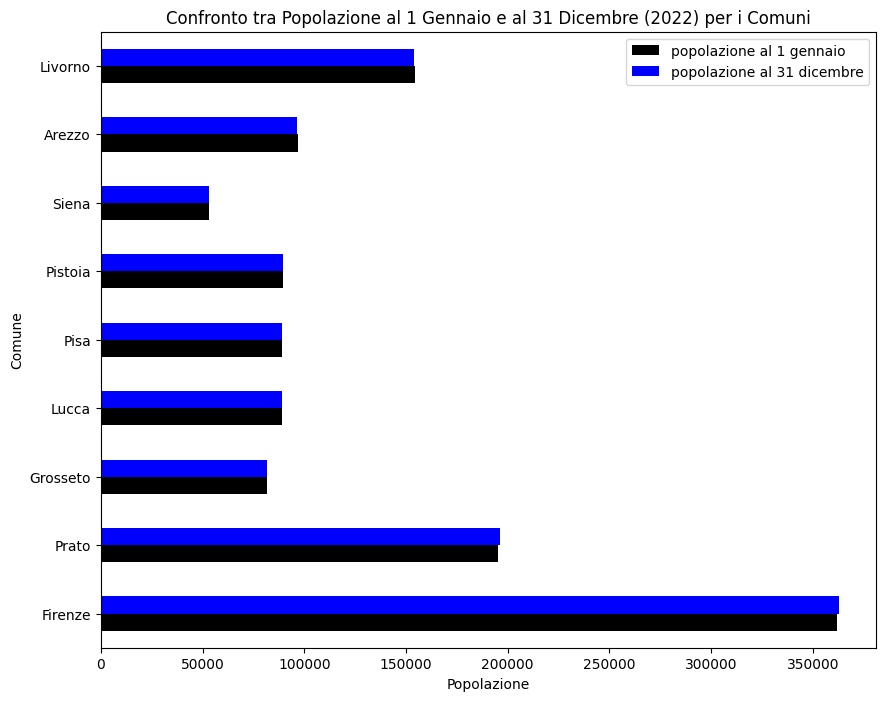

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/originali/movimento_popolazione_2022.csv")

#selezioniamo solo i comuni che ci interessano, ovvero i capoluoghi di provincia
comuni_interesse = ['Firenze', 'Arezzo', 'Grosseto', 'Livorno', 'Lucca', 'Massa-Carrara', 'Pisa', 'Pistoia', 'Prato', 'Siena']


df_selected = df[df['Territorio'].isin(comuni_interesse)][['Territorio', 'popolazione al 1 gennaio', 'popolazione al 31 dicembre']]

#ordiniamo il DataFrame in base alla differenza tra le popolazioni
df_selected['dif'] = df_selected['popolazione al 31 dicembre'] - df_selected['popolazione al 1 gennaio']
df_selected_sorted = df_selected.sort_values(by='dif', ascending=False)

ax = df_selected_sorted.plot.barh(x='Territorio', y=['popolazione al 1 gennaio', 'popolazione al 31 dicembre'], color=['black', 'blue'], figsize=(10, 8))
ax.set_xlabel('Popolazione')
ax.set_ylabel('Comune')
ax.set_title('Confronto tra Popolazione al 1 Gennaio e al 31 Dicembre (2022) per i Comuni')
plt.show()


Notiamo che non vi è una differenza di popolazione significativa tra l'inizio e la fine dell'anno

Popolazione per provincia:
       Provincia  Popolazione
0         Arezzo    4651696.0
1        Firenze   95964123.0
2       Grosseto    4532039.0
3        Livorno    3357903.0
4          Lucca    7099403.0
5  Massa-carrara    2536277.0
6           Pisa    6839421.0
7        Pistoia    3086508.0
8          Prato    3487251.0
9          Siena    3755909.0


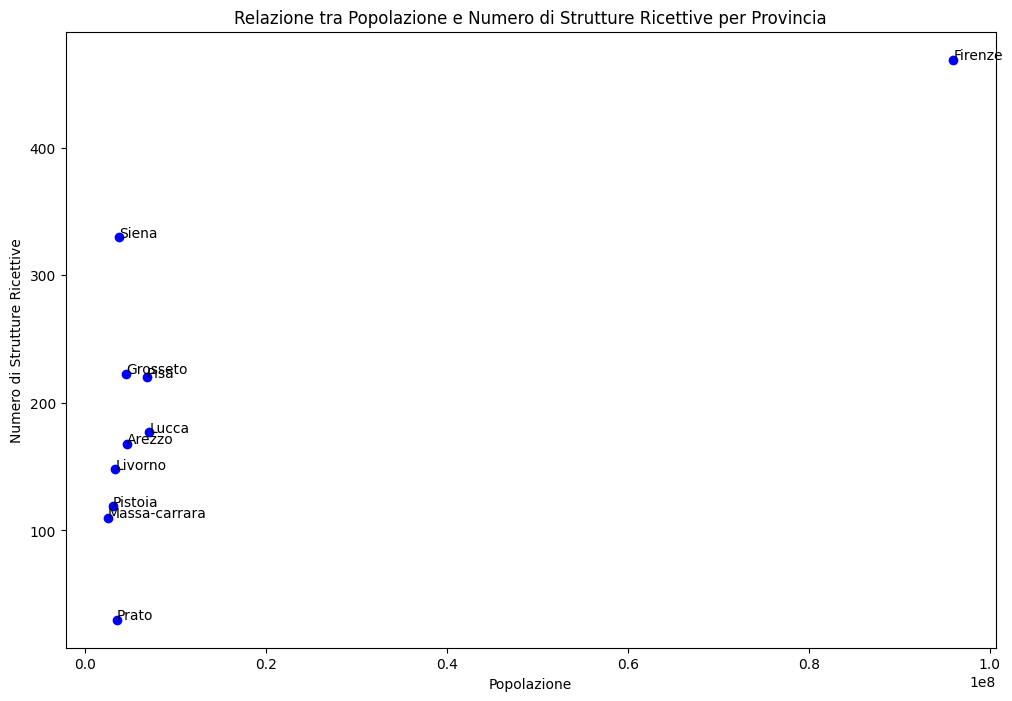

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/merge/Merged.csv")

#Filtriamo solo le righe con categoria diversa da Ristorante e Bottega poiché tali valori li possiede 
#solo Firenze
df_strutture_ricettive = df[~df['Categoria'].isin(['Ristorante', 'Bottega'])]

# Popolazione totale di ogni provincia ottenuta come somma dei vari comuni per ogni popolazione
popolazione_per_provincia = df.groupby('Provincia')['Popolazione'].sum().reset_index()
num_strutture_per_provincia = df_strutture_ricettive.groupby('Provincia')['Id'].count().reset_index()
num_strutture_per_provincia.columns = ['Provincia', 'NumeroStrutture']

df_provincia_info = pd.merge(popolazione_per_provincia, num_strutture_per_provincia, on='Provincia')

#vediamo la popolazione per ogni provincia
print("Popolazione per provincia:")
print(df_provincia_info[['Provincia', 'Popolazione']])

fig, ax = plt.subplots(figsize=(12, 8)) #dimensione del grafico a dispersione

#grafico a dispersione
ax.scatter(df_provincia_info['Popolazione'], df_provincia_info['NumeroStrutture'], color='blue')

ax.set_xlabel('Popolazione')
ax.set_ylabel('Numero di Strutture Ricettive')
ax.set_title('Relazione tra Popolazione e Numero di Strutture Ricettive per Provincia')

for i, row in df_provincia_info.iterrows():
    ax.annotate(row['Provincia'], (row['Popolazione'], row['NumeroStrutture']))

plt.show()


Notiamo come Siena, nonostante abbia una popolazione sotto la media, è seconda per numero di strutture ricettive sotto Firenze.

Un risultato altrettanto significativo riguardo la città di Siena si può evincere selezionando la singola categoria "Alberghi". Questa volta utilizziamo una query Sparql:


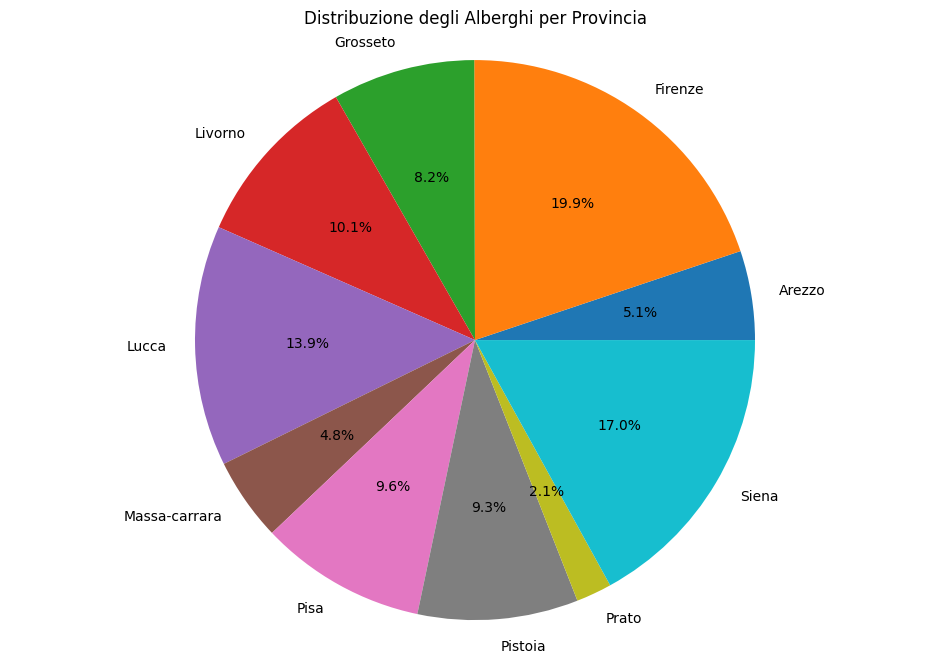

In [3]:
from rdflib import Graph, Namespace, URIRef
import pandas as pd
import matplotlib.pyplot as plt

g = Graph()
g.parse("dataset/5_stelle/Graph.ttl", format="ttl")


lt_o = Namespace("http://www.localitoscana.it/ontology/")


query = """
PREFIX lt_o: <http://www.localitoscana.it/ontology/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?province (COUNT(?struttura) AS ?numAlberghi)
WHERE {
  ?struttura lt_o:hasCategory "Alberghi"^^xsd:string ;
             lt_o:hasProv ?province .
}
GROUP BY ?province
ORDER BY ?province

"""


results = g.query(query)

data = []
for result in results:
    provincia = result[0]
    num_alberghi = int(result[1])
    data.append({"Provincia": provincia, "Numero Alberghi": num_alberghi})

df = pd.DataFrame(data)


plt.figure(figsize=(12, 8))
plt.pie(df["Numero Alberghi"], labels=df["Provincia"], autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Distribuzione degli Alberghi per Provincia')
plt.show()



_Distribuzione degli Alberghi per provincia._

_________________________________________________________________________________________________________________________________________________<br>
_Visualizzazione con uMap_<br>


Attraverso `uMap`, servizio fornito da `OpenStreeMap` è possibile creare, visualizzare e salvare mappe a partire dai vari datasets. Il link seguente mostra la mappa dei locali su cui è stato svolto il report:
https://umap.openstreetmap.fr/it/map/anonymous-edit/1016506:kTSsDC_64iSV9CmG0Qv_SiyC4v39V4W96DwPRuf4nFI